In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('Booking.csv')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [105]:
df.drop('Booking_ID', axis = 1, inplace = True)

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36282.0,103.422747,35.086593,0.0,80.3,99.45,120.0,540.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36284 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36282 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [108]:
df['booking status'].value_counts()

,count
booking status,
Not_Canceled,24396
Canceled,11889


In [57]:
object_columns = df.drop(['booking status', 'date of reservation'], axis = 1).select_dtypes(include=['object']).columns
df[object_columns].nunique()

,0
type of meal,4
room type,7
market segment type,5


In [58]:
object_columns

Index(['type of meal', 'room type', 'market segment type'], dtype='object')

In [59]:
df['booking status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [60]:
df.isnull().sum()

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,1
lead time,0
market segment type,0
repeated,0


In [61]:
df['average price'].fillna(df['average price'].mean(), inplace = True)

In [62]:
df['room type'].fillna(df['room type'].mode()[0], inplace = True)
# Fill Nan with KNN.

<Axes: >

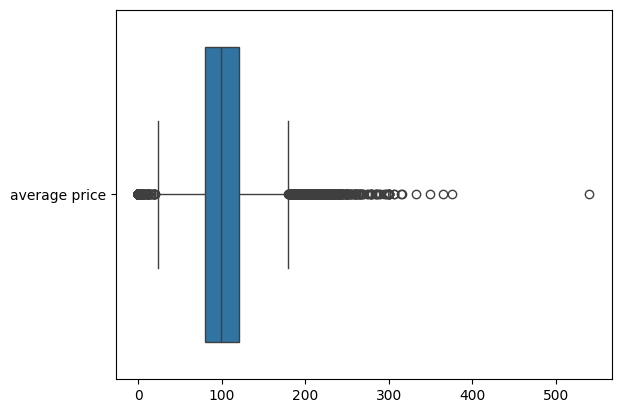

In [63]:
# Check for Outliers using Boxplot
# Get Numerical Columns
numerical_columns = df.select_dtypes(include=['float64']).columns
sns.boxplot(df[numerical_columns], orient = 'h')

In [64]:
outlier_columns = ['average price']
for i in outlier_columns:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  # Clipping
  df[i].clip(lower_bound, upper_bound, inplace = True)

In [65]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors = 'coerce')
# Parser

In [66]:
df.isnull().sum()

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0
repeated,0


In [67]:
df.dropna(inplace = True)

In [68]:
df['Year'] = df['date of reservation'].dt.year
df['Month'] = df['date of reservation'].dt.month
df['Day'] = df['date of reservation'].dt.day

In [69]:
df.drop('date of reservation', axis = 1, inplace = True)

In [70]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Year,Month,Day
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11


In [50]:
!pip install category_encoders

In [72]:
df['booking status'].replace({'Not_Canceled': 0, 'Canceled': 1}, inplace = True)

In [74]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(object_columns)
df = ohe.fit_transform(df)

In [75]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal_1,type of meal_2,type of meal_3,type of meal_4,car parking space,room type_1,...,market segment type_5,repeated,P-C,P-not-C,average price,special requests,booking status,Year,Month,Day
0,1,1,2,5,1,0,0,0,0,1,...,0,0,0,0,88.00,0,0,2015,10,2
1,1,0,1,3,0,1,0,0,0,1,...,0,0,0,0,106.68,1,0,2018,11,6
2,2,1,1,3,1,0,0,0,0,1,...,0,0,0,0,50.00,0,1,2018,2,28
3,1,0,0,2,1,0,0,0,0,1,...,0,0,0,0,100.00,1,1,2017,5,20
4,1,0,1,2,0,1,0,0,0,1,...,0,0,0,0,77.00,0,1,2018,4,11


In [76]:
x = df.drop('booking status', axis = 1)
y = df['booking status']

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [79]:
# Apply Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(estimator = dt, param_grid = params, cv = 5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [80]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best Parameters:', best_params)
print('Best Score:', best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8702326501001956


In [81]:
best_model_dt = grid_search.best_estimator_

In [83]:
y_pred = best_model_dt.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8729655172413793


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]}

grid_search = GridSearchCV(estimator = gb, param_grid = params, cv = 5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
grid_search.fit(x_train, y_train)

In [ ]:
best_model_gb = grid_search.best_estimator_

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3, 5, 7],
    'p': [1, 2, 3]
}
grid_search = GridSearchCV(estimator = knn, param_grid = params, cv = 5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2, 3]},
             scoring='accuracy')

In [87]:
!pip install imbalanced-learn

In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
x, y = make_classification(n_samples = 1000, n_features = 20, n_informative = 2, n_redundant = 10, weights = [0.1, 0.9])
print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


In [91]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [93]:
smote = SMOTE(random_state = 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [94]:
x_train_resampled.shape

(1240, 20)

In [98]:
print(y_train_resampled[1:500])

[1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [99]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

In [100]:
x_train_resampled.shape

(160, 20)

In [101]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state = 42)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

In [102]:
x_train_resampled.shape

(1240, 20)